# Titanic Data

In [1]:
import pandas as pd

In [2]:
tn =pd.read_excel(r"F:\carreer\titanic3.xls")

In [3]:
tn.shape

(1309, 14)

In [4]:
tn.isnull().sum() # checking the null

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [5]:
tn.age = tn.age.fillna(tn.age.mean())
tn.fare = tn.fare.fillna(tn.fare.mean())
tn.embarked = tn.embarked.fillna("S")
tn.boat = tn.boat.fillna(13)
tn.body = tn.body.fillna(tn.body.mean())

In [6]:
tn.drop(['cabin','home.dest','name','ticket','fare'], axis=1,inplace=True) # dropping the unnecessary x factors

In [7]:
tn.head()

,pclass,survived,sex,age,sibsp,parch,embarked,boat,body
0,1,1,female,29.0000,0,0,S,2,160.809917
1,1,1,male,0.9167,1,2,S,11,160.809917
2,1,0,female,2.0000,1,2,S,13,160.809917
3,1,0,male,30.0000,1,2,S,13,135.000000
4,1,0,female,25.0000,1,2,S,13,160.809917


In [8]:
tn.sex

0       female
1         male
2       female
3         male
4       female
         ...  
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: object

# Non-Numeric to numeric

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
# doing one by one

tn.sex=tn.sex.astype('str')
tn.embarked=tn.embarked.astype('str')
tn.boat=tn.boat.astype('str')


In [11]:
# just a code to convert object to numeric data in one go

tn[tn.select_dtypes(include=['object']).columns]=tn[tn.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [12]:
tn.info() # just confirming the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   int32  
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   embarked  1309 non-null   int32  
 7   boat      1309 non-null   int32  
 8   body      1309 non-null   float64
dtypes: float64(2), int32(3), int64(4)
memory usage: 76.8 KB


In [13]:
tn.head(10)

,pclass,survived,sex,age,sibsp,parch,embarked,boat,body
0,1,1,0,29.0000,0,0,2,11,160.809917
1,1,1,1,0.9167,1,2,2,2,160.809917
2,1,0,0,2.0000,1,2,2,4,160.809917
3,1,0,1,30.0000,1,2,2,4,135.000000
4,1,0,0,25.0000,1,2,2,4,160.809917
5,1,1,1,48.0000,0,0,2,12,160.809917
6,1,1,0,63.0000,1,0,2,1,160.809917
7,1,0,1,39.0000,0,0,2,4,160.809917
8,1,1,0,53.0000,2,0,2,26,160.809917
9,1,0,1,71.0000,0,0,0,4,22.000000


# Data Sampling 

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
train_tn , test_tn = train_test_split(tn,test_size = .2)

In [16]:
train_tn_x = train_tn.iloc[: , [0,2,3,4,5,6,7]]
train_tn_y = train_tn.iloc[: , 1]

In [17]:
test_tn_x = test_tn.iloc[: , [0,2,3,4,5,6,7]]
test_tn_y = test_tn.iloc[: , 1]

In [18]:
print(train_tn_x.shape)
print(train_tn_y.shape)
print("-------")
print(test_tn_x.shape)
print(test_tn_y.shape)

(1047, 7)
(1047,)
-------
(262, 7)
(262,)


# Building the Model

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_tn = LogisticRegression()

In [22]:
log_tn.fit(train_tn_x , train_tn_y); # model has been build

In [23]:
pred = log_tn.predict(test_tn_x)

In [24]:
len(pred) # record in test data

262

In [26]:
pd.crosstab(test_tn_y , pred) 

col_0,0,1
survived,,
0,156,5
1,23,78


# confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
tab_tn = confusion_matrix(test_tn_y , pred)
tab_tn # from top it is predicted

array([[156,   5],
       [ 23,  78]], dtype=int64)

In [29]:
tab_tn = confusion_matrix( pred , test_tn_y )
tab_tn # predicted from left to right

array([[156,  23],
       [  5,  78]], dtype=int64)

# Accuracy

In [30]:
from sklearn.metrics import accuracy_score # for accuracy 

In [31]:
accuracy_score(test_tn_y , pred)

0.8931297709923665

# precision

In [32]:
from sklearn.metrics import precision_score # for precision

In [33]:
precision_score(test_tn_y ,pred)

0.9397590361445783

# recall

In [34]:
from sklearn.metrics import recall_score # to find recall

In [35]:
recall_score(test_tn_y , pred)

0.7722772277227723

# F1 ratio

In [36]:
from sklearn.metrics import f1_score # to find f1 ratio

In [37]:
f1_score(test_tn_y , pred)

0.8478260869565218

# ROC curve

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [39]:
pred = log_tn.predict(test_tn_x) #pred

In [41]:
pred_prob = log_tn.predict_proba(test_tn_x) # proba mean to predict probsblity

In [42]:
pred_prob

array([[8.43494272e-01, 1.56505728e-01],
       [8.37983511e-01, 1.62016489e-01],
       [2.07718996e-03, 9.97922810e-01],
       [9.53579509e-01, 4.64204911e-02],
       [1.39130363e-02, 9.86086964e-01],
       [7.79856041e-01, 2.20143959e-01],
       [8.48851401e-01, 1.51148599e-01],
       [9.09031243e-01, 9.09687575e-02],
       [9.72822949e-01, 2.71770506e-02],
       [9.63608814e-01, 3.63911862e-02],
       [9.42620139e-01, 5.73798609e-02],
       [9.31741226e-01, 6.82587739e-02],
       [9.45019339e-01, 5.49806609e-02],
       [2.19352482e-03, 9.97806475e-01],
       [8.31299058e-01, 1.68700942e-01],
       [8.89639664e-02, 9.11036034e-01],
       [5.04634807e-01, 4.95365193e-01],
       [9.45019339e-01, 5.49806609e-02],
       [4.25097884e-03, 9.95749021e-01],
       [6.77918585e-01, 3.22081415e-01],
       [2.06461866e-03, 9.97935381e-01],
       [8.78423863e-01, 1.21576137e-01],
       [9.21244321e-01, 7.87556785e-02],
       [9.57710565e-01, 4.22894351e-02],
       [7.426484

In [43]:
roc_auc_score(test_tn_y , pred) # this is the area under the curve

0.8706106635508272

# Plotting the curve

In [44]:
import matplotlib.pyplot as plt

In [47]:
# ROC CURVE
fpr , tpr , thres = roc_curve(test_tn_y , pred_prob[: , 1])  # this will return 3 things fpr tpr thres

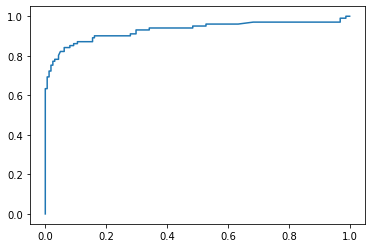

In [48]:
plt.plot(fpr , tpr) # graph of curve

Text(0.5, 0.5, 'Auroc is 0.8706106635508272 ')

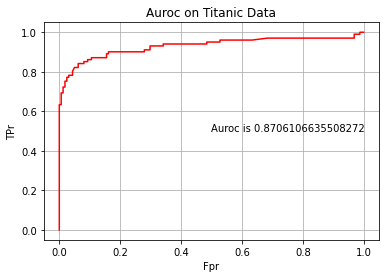

In [49]:
# not looking lets represent it
plt.plot(fpr , tpr , color = 'r')
plt.xlabel("Fpr") # show on x axis
plt.ylabel("TPr") # show on y axis
plt.title("Auroc on Titanic Data") # to add title
plt.grid() # to show grid
plt.text(x = .5 , y = .5 , s="Auroc is 0.8706106635508272 ") # to plot text

In [50]:
import pandas as pd

In [51]:
tn = pd.read_excel(r"F:\carreer\titanic3.xls")

In [52]:
tn.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [53]:
tab1=pd.crosstab(tn.sex , tn.survived)
tab1

survived,0,1
sex,,
female,127,339
male,682,161


In [54]:
from scipy.stats import chi2_contingency

In [55]:
chi2_contingency(tab1) # calculated value,pvalue,df,expeced value

(363.6179084388249,
 4.589924936952945e-81,
 1,
 array([[288.00152788, 177.99847212],
        [520.99847212, 322.00152788]]))

In [56]:
cal_val , p_value ,dof ,expect = chi2_contingency(tab1)

In [57]:
p_value

4.589924936952945e-81

In [58]:
def ch_sqare_test(tab):
    from scipy.stats import chi2_contingency
    cal_val , p_value,dof , expect =chi2_contingency(tab)
    if p_value <.05:
        print("since the P value is less than .05" , p_value , "we reject the null")
        print("ther is no relation b/w 2 variables")
    else: 
        print("since the P value is more than .05" , p_value ,"we fail to reject the null" )
        print("ther is relation b/w 2 variables")

In [59]:
ch_sqare_test(tab1)

since the P value is less than .05 4.589924936952945e-81 we reject the null
ther is no relation b/w 2 variables


In [ ]:
# know what we should do 

In [61]:
tab2=pd.crosstab(tn.survived , tn.pclass)
tab2 # chances of class 3 is hard to survive

pclass,1,2,3
survived,,,
0,123,158,528
1,200,119,181


In [62]:
chi2_contingency(pd.crosstab(tn.survived , tn.pclass))

(127.85915643930328,
 1.7208259588256052e-28,
 2,
 array([[199.62337662, 171.19404125, 438.18258212],
        [123.37662338, 105.80595875, 270.81741788]]))

In [63]:
tn.groupby('pclass').fare.mean() # high relation between fare and survival and pclass

pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64

In [70]:
# what is the chance of survival when person is male and travelling in class 3?
tn1 = tn[(tn.sex == 'male') & (tn.pclass == 3)]
tn1.shape

(493, 14)

In [71]:
pd.crosstab(tn1.sex , tn1.survived)

survived,0,1
sex,,
male,418,75


In [73]:
75 / (75+418) # poor male survived in titanic shape

0.15212981744421908